In [5]:
import sys
sys.path.append('../')
from cardiac_evalfunctions import *

To see the dynamics during training validation curves can be plotted by calling `plot_validation_curves(<path_to_config_files>, [optional <list of method names>], [optional <list of random seeds>])`.
Note: Plotting those curves is only useful for methods trained on a continuous datastream

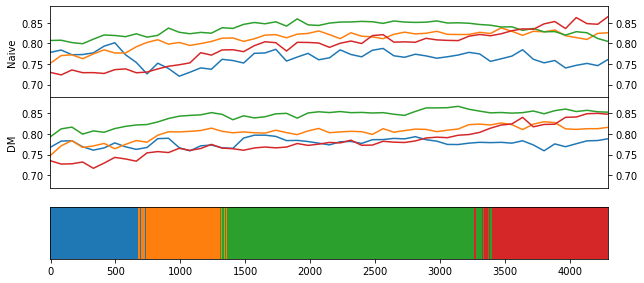

In [2]:
plot_validation_curves(['../training_configs/cardiac_naive.yml', '../training_configs/cardiac_dynamicmemory.yml'], names=['Naive', 'DM'])

To evaluate a specific config call `eval_config(<path_to_config_file>)`.

Results are cached to avoid recalculation.

In [3]:
eval_config('../training_configs/cardiac_dynamicmemory.yml')

,scanner,shift,dice_lv,dice_myo,dice_rv,mean
2,Canon,None,0.912984,0.777842,0.834341,0.841722
6,GE,None,0.804811,0.675086,0.789585,0.756494
10,Philips,None,0.856177,0.733410,0.842741,0.810776
14,Siemens,None,0.839504,0.710216,0.830284,0.793335
0,BWT,None,0.013371,0.009295,0.006351,0.009672
1,FWT,None,0.033569,0.066239,0.039283,0.046364


To evaluate multiple configs at once and get an overview call `eval_config_list(<path_to_config_files>, <list of method names>, [optional <list of random seeds>])`

In [4]:
df_overview = eval_config_list(['../training_configs/cardiac_naive.yml', '../training_configs/cardiac_dynamicmemory.yml'], ['Naive', 'DM'])
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
DM,0.793,0.756,0.811,0.842,0.010,0.046
Naive,0.783,0.741,0.789,0.843,-0.012,0.053


If a specific dice score is of intrest the parameter `value` can be added to get the evaluation for either left ventricle (dice_lv), left ventricular myocardium (dice_myo) or the right ventricle (dice_rv).

In [5]:
df_overview = eval_config_list(['../training_configs/cardiac_naive.yml', '../training_configs/cardiac_dynamicmemory.yml'], ['Naive', 'DM'], value='dice_lv')
df_overview[['Siemens', 'GE', 'Philips', 'Canon', 'BWT', 'FWT']]

scanner,Siemens,GE,Philips,Canon,BWT,FWT
model,,,,,,
DM,0.840,0.805,0.856,0.913,0.013,0.034
Naive,0.842,0.799,0.853,0.911,0.002,0.032
